# 0. 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
sales_before_df = pd.read_csv('https://raw.githubusercontent.com/zzuupp/-Screen-Wizard/refs/heads/main/Data/processed/before/filtered_before_boxoffice.csv', encoding='utf-8', index_col = 0)
sales_after_df = pd.read_csv('https://raw.githubusercontent.com/zzuupp/-Screen-Wizard/refs/heads/main/Data/processed/after/filtered_after_boxoffice.csv', encoding='utf-8', index_col = 0)

actors_before_df = pd.read_csv('https://raw.githubusercontent.com/zzuupp/-Screen-Wizard/refs/heads/main/Data/raw/before/before_actors.csv', encoding='utf-8', index_col = 0)
actors_after_df = pd.read_csv('https://raw.githubusercontent.com/zzuupp/-Screen-Wizard/refs/heads/main/Data/processed/after/after_actors.csv', encoding='utf-8', index_col = 0)

genres_before_df = pd.read_csv('https://raw.githubusercontent.com/zzuupp/-Screen-Wizard/refs/heads/main/Data/raw/before/before_genres.csv', encoding='utf-8', index_col = 0)
genres_after_df = pd.read_csv('https://raw.githubusercontent.com/zzuupp/-Screen-Wizard/refs/heads/main/Data/raw/after/after_genres.csv', encoding='utf-8', index_col = 0)

directors_before_df = pd.read_csv('https://raw.githubusercontent.com/zzuupp/-Screen-Wizard/refs/heads/main/Data/raw/before/before_directors.csv', encoding='utf-8', index_col = 0)
directors_after_df = pd.read_csv('https://raw.githubusercontent.com/zzuupp/-Screen-Wizard/refs/heads/main/Data/raw/after/after_directors.csv', encoding='utf-8', index_col = 0)

movie_before_df = pd.read_csv('https://raw.githubusercontent.com/zzuupp/-Screen-Wizard/refs/heads/main/Data/raw/before/before_movie.csv', encoding='utf-8', index_col = 0)
movie_after_df = pd.read_csv('https://raw.githubusercontent.com/zzuupp/-Screen-Wizard/refs/heads/main/Data/raw/after/after_movie.csv', encoding='utf-8', index_col = 0)

showtypes_before_df = pd.read_csv('https://raw.githubusercontent.com/zzuupp/-Screen-Wizard/refs/heads/main/Data/raw/before/before_showtypes.csv', encoding='utf-8', index_col = 0)
showtypes_after_df = pd.read_csv('https://raw.githubusercontent.com/zzuupp/-Screen-Wizard/refs/heads/main/Data/raw/after/after_showtypes.csv', encoding='utf-8', index_col = 0)

## 0-1. 데이터 별 concat

In [3]:
sales_df = pd.concat([sales_before_df, sales_after_df], ignore_index=True)
actors_df = pd.concat([actors_before_df, actors_after_df], ignore_index=True)
genres_df = pd.concat([genres_before_df, genres_after_df], ignore_index=True)
movie_df = pd.concat([movie_before_df, movie_after_df], ignore_index=True)
showtypes_df = pd.concat([showtypes_before_df, showtypes_after_df], ignore_index=True)
directors_df = pd.concat([directors_before_df, directors_after_df], ignore_index=True)

# 1. 데이터 별 전처리

1) 결측치 확인

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7245 entries, 0 to 7244
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           7245 non-null   int64  
 1   rankInten      7245 non-null   int64  
 2   rankOldAndNew  7245 non-null   object 
 3   movieCd        7245 non-null   object 
 4   movieNm        7245 non-null   object 
 5   openDt         7245 non-null   object 
 6   salesAmt       7245 non-null   int64  
 7   salesShare     7245 non-null   float64
 8   salesInten     7245 non-null   int64  
 9   salesChange    7245 non-null   float64
 10  salesAcc       7245 non-null   int64  
 11  audiCnt        7245 non-null   int64  
 12  audiInten      7245 non-null   int64  
 13  audiChange     7245 non-null   float64
 14  audiAcc        7245 non-null   int64  
 15  scrnCnt        7245 non-null   int64  
 16  showCnt        7245 non-null   int64  
 17  showRange      7245 non-null   object 
 18  yearWeek

In [5]:
actors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50136 entries, 0 to 50135
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   peopleNm    50136 non-null  object
 1   peopleNmEn  29855 non-null  object
 2   cast        40331 non-null  object
 3   castEn      1189 non-null   object
 4   movieCd     50136 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


- 결측치가 많이 존재하는, PeopleNmEn과 castEn은 불필요한 컬럼으로 판단해서 제거

In [6]:
actors_df.drop(columns = ['peopleNmEn', 'castEn'], inplace=True)

In [7]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7653 entries, 0 to 7652
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   genreNm  7653 non-null   object
 1   movieCd  7653 non-null   object
dtypes: object(2)
memory usage: 119.7+ KB


In [8]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007 entries, 0 to 4006
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movieCd     4007 non-null   object 
 1   movieNm     4006 non-null   object 
 2   showTm      3990 non-null   float64
 3   prdtYear    4003 non-null   float64
 4   openDt      3991 non-null   float64
 5   prdtStatNm  4004 non-null   object 
 6   typeNm      4006 non-null   object 
 7   nations     4007 non-null   object 
 8   gradeNm     3990 non-null   object 
dtypes: float64(3), object(6)
memory usage: 281.9+ KB


In [9]:
showtypes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8660 entries, 0 to 8659
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   showTypeGroupNm  8660 non-null   object
 1   showTypeNm       8660 non-null   object
 2   movieCd          8660 non-null   object
dtypes: object(3)
memory usage: 203.1+ KB


In [10]:
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   peopleNm    4248 non-null   object
 1   peopleNmEn  4137 non-null   object
 2   movieCd     4248 non-null   object
dtypes: object(3)
memory usage: 99.7+ KB


- actors_df으르 제외한 나머지 데이터들은 결측치가 절반 이상 존재하므로 EDA 탐색을 통해 계속 확인할 계획 

# 2. EDA

- 'movieCd' :  영화 대표 코드
- 'rnum' : 순번
- 'rank' : 해당일자의 박스오피스 순위
- 'rankInten' : 전일대비 순위의 증감분
- 'rankOldAndNew' : 랭킹에 신규진입여부
- 'movieNm' : 영화명
- 'openDt' : 영화의 개봉일
- 'salesAmt' : 해당일의 매출액
- 'salesShare' : 해당일자 상영작의 매출총액 대비 해당영화의 매출비율
- 'salesInten' : 전일 대비 매출액 증감분
- 'salesChange' : 전일 대비 매출액 증감 비율
- 'salesAcc' : 누적매출액
- 'audiCnt' : 해당일의 관객수
- 'audiInten' : 전일 대비 관객수 증감분
- 'audiChange' : 전일 대비 관객수 증감 비율
- 'audiAcc' : 누적관객수
- 'scrnCnt' : 해당일자에 상영한 스크린 수
- 'showCnt' : 해당일자에 상영된 횟수
- 'showRange', '
- yearWeekTime' :  
- 'boxofficeType' : 박스 오피스 종류
- 'count': 

### 2-1. 가장 높은 누적 관객수의 영화에 출연한 배우들의 분포 
- actors_df에는 중복되는 코드값이 존재하므로 제거
- saels_df의 salesAcc는 누적 매출액으로 각 movieCd의 max만 추출 
- actors_df와 sales_df merge
- 2011년부터 2024년까지의 데이터 활용

In [11]:
# peopleNm과 movieCd의 중복되는 코드 삭제
actors_df[(actors_df['movieCd'] == '20198414') & (actors_df['peopleNm'] == '마동석')]

,peopleNm,cast,movieCd
35094,마동석,거석이형,20198414
35668,마동석,거석이형,20198414


In [12]:
actors_df = actors_df.drop_duplicates(subset=['peopleNm','cast','movieCd'], keep='first')

In [13]:
#최고 누적매출액 기준으로 필터링
sales_max_df = sales_df.loc[sales_df.groupby('movieNm')['audiAcc'].idxmax()]
len(sales_max_df)

2633

In [14]:
actors_sales_df = actors_df.merge(sales_max_df, on = 'movieCd', how = 'left')
#데이터 기간 필터링
actors_sales_df = actors_sales_df[(actors_sales_df['openDt'] >= '2011-01-01') & (actors_sales_df['openDt'] < '2025-01-01')]

In [15]:
actors_sales_df.shape

(37030, 22)

In [174]:
# 시각화화
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows 기준: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

C:\Users\tmdwn\AppData\Local\Temp\ipykernel_51580\1272735862.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = top_sales_actors_20['peopleNm'], y = top_sales_actors_20['audiAcc_'], palette='tab20')
C:\Users\tmdwn\AppData\Local\Temp\ipykernel_51580\1272735862.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, fontweight='bold')
C:\Users\tmdwn\AppData\Local\Temp\ipykernel_51580\1272735862.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='bold')


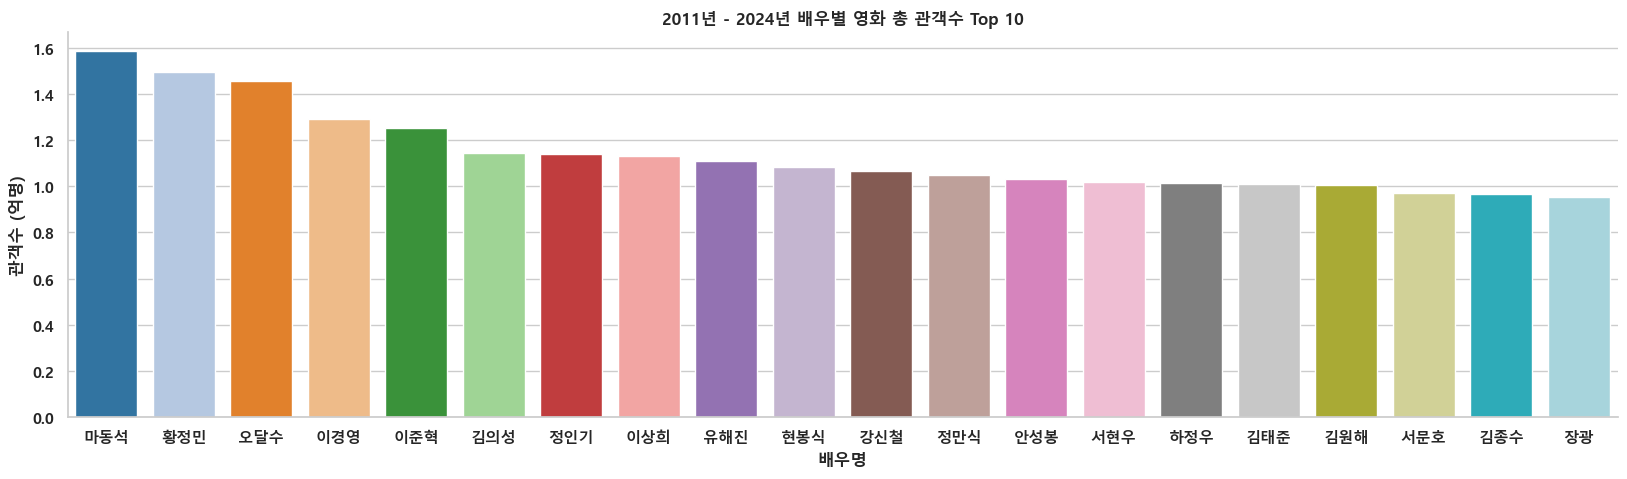

In [184]:
#배우별 출연영화 관객수 누계 
actors_sum_sales_df = actors_sales_df.groupby('peopleNm')['audiAcc'].sum().reset_index()

#top20 데이터셋 
top_sales_actors = actors_sum_sales_df.sort_values(by='audiAcc', ascending=False)
top_sales_actors['audiAcc_'] = top_sales_actors['audiAcc'] / 100000000 #관객수 1억명 단위
top_sales_actors_20 = top_sales_actors.head(20)

#시각화
plt.figure(figsize = (20, 5))
ax = sns.barplot(x = top_sales_actors_20['peopleNm'], y = top_sales_actors_20['audiAcc_'], palette='tab20')

plt.title('2011년 - 2024년 배우별 영화 총 관객수 Top 10', fontweight = 'bold')
plt.ylabel("관객수 (억명)", fontweight = 'bold')
plt.xlabel("배우명", fontweight = 'bold')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='bold')

sns.despine()

plt.show()

- 마동석 배우가 가장 많은 누적 관객 수를 기록함.
- 상위권의 배우들은 대부분 중장년 배우들로, 많은 경험을 가진 배우들로 확인.
- 주연보다는 조연의 배우들이 많은 작품에 참여하기 때문에 누적 관객수에서는 높은 순위에 있는 것으로 판단.
    - 누적 관람객 수 top 20의 배우들이 많은 작품에 참여했기 때문에 관람객 수가 높은지 확인해보자.

In [185]:
# top 20명의 영화 출연 횟수 

#top20의 출연횟수 산출
top_20_actors = top_sales_actors_20['peopleNm']
top_20_actors_count = actors_sales_df[actors_sales_df['peopleNm'].isin(top_20_actors)].groupby('peopleNm')['movieNm'].nunique().reset_index()
top_20_actors_count.rename(columns = {'movieNm' : 'count'}, inplace=True)

#출연횟수 데이터 병합
top_sales_actors_20 = top_sales_actors_20.merge(top_20_actors_count, on = 'peopleNm', how = 'left')
top_sales_actors_20

,peopleNm,audiAcc,audiAcc_,count
0,마동석,158719825.0,1.587198,36
1,황정민,149312696.0,1.493127,39
2,오달수,145610741.0,1.456107,29
3,이경영,129170066.0,1.291701,43
4,이준혁,125048046.0,1.250480,44
5,김의성,114310673.0,1.143107,32
6,정인기,114147397.0,1.141474,38
7,이상희,112893338.0,1.128933,54
8,유해진,111129606.0,1.111296,27
9,현봉식,108377829.0,1.083778,40


C:\Users\tmdwn\AppData\Local\Temp\ipykernel_51580\229816629.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 11, fontweight = 'bold')
C:\Users\tmdwn\AppData\Local\Temp\ipykernel_51580\229816629.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 11, fontweight = 'bold')


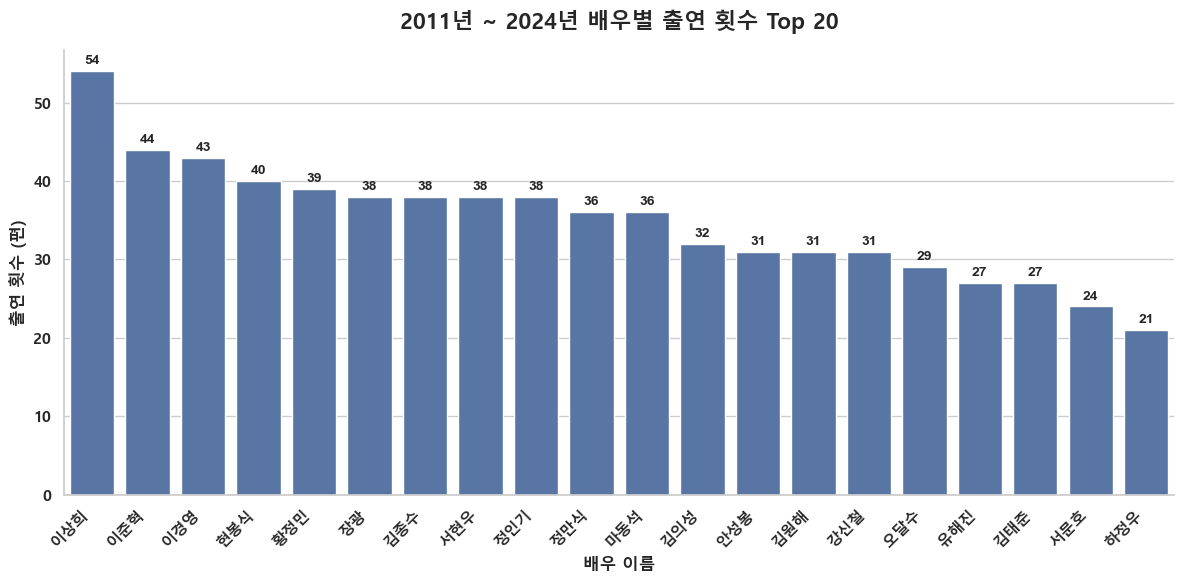

In [186]:
# 스타일 설정  # 컬러 팔레트 설정

# 그래프 크기 및 스타일 설정
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_sales_actors_20.sort_values('count', ascending=False),  # 출연 횟수 기준 내림차순 정렬
    x='peopleNm',
    y='count'
)
sns.set_style('white')
# 제목 및 라벨
plt.title('2011년 ~ 2024년 배우별 출연 횟수 Top 20', fontsize=16, weight='bold', pad=15)
plt.xlabel('배우 이름', fontsize=12, fontweight = 'bold')
plt.ylabel('출연 횟수 (편)', fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight = 'bold')

# 막대 위에 출연 횟수 텍스트 표기
for i, value in enumerate(top_sales_actors_20.sort_values('count', ascending=False)['count']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticklabels(ax.get_xticklabels(), fontsize = 11, fontweight = 'bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 11, fontweight = 'bold')
# 레이아웃 정리 및 출력
plt.tight_layout()
sns.despine()
plt.show()

- 마동석, 황정민, 오달수 같은 경우에는 top 20의 배우들 중 중간정도의 작품 참여 횟수를 보이나, 누적 관객수는 더 많음을 보여준다.
    - 소수의 영화로도 흥행을 만든 배우들이 존재 (마동석, 오달수)
- 이상희, 이준혁, 이경영, 현봉식 등은 꾸준하게 영화에 출연

#### 가설 검증
- 가설: 출연횟수가 많을 수록 누적 관람객 수가 많다. 

1) 산점도 확인

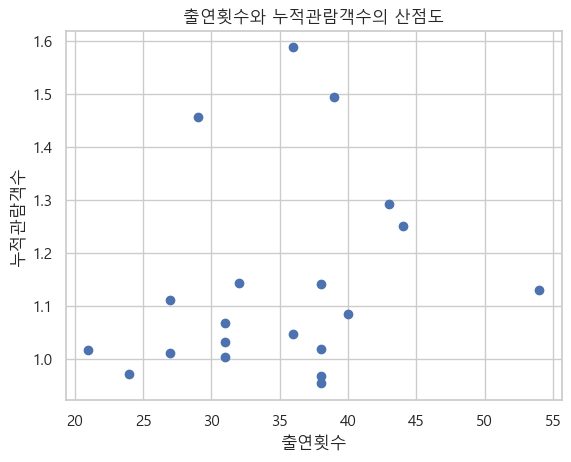

In [194]:
plt.scatter(top_sales_actors_20['count'], top_sales_actors_20['audiAcc_'])
plt.title('출연횟수와 누적관람객수의 산점도')
plt.xlabel('출연횟수')
plt.ylabel('누적관람객수')
plt.show()

- 산점도 확인 결과
    1) 출연횟수는 중간인데, 누적관람객수가 높은 경우
    2) 출연횟수는 가장 많은데, 누적 관램객수는 저조한 경우

```python
** 출연횟수는 중간인데, 누적관람객수가 높은 경우
    
    - 마동석, 황정민, 오달수 
        - 주요 장르
        - 배우별 영화 리스트
```

In [188]:
top3_actors = actors_df[(actors_df['peopleNm'] == '마동석') | (actors_df['peopleNm'] == '황정민') | (actors_df['peopleNm'] == '오달수')]
top3_actors = pd.merge(top3_actors, genres_df, on = 'movieCd', how = 'left')

In [189]:
movie_name = sales_max_df[['movieCd', 'movieNm', 'audiAcc']]
top3_actors = pd.merge(top3_actors, movie_name, on = 'movieCd', how = 'left')
top3_actors = top3_actors.dropna()
top3_actors

,peopleNm,cast,movieCd,genreNm,movieNm,audiAcc
76,오달수,개장수,20102414,코미디,조선명탐정 : 각시투구꽃의 비밀,4766907.0
77,오달수,개장수,20102414,액션,조선명탐정 : 각시투구꽃의 비밀,4766907.0
78,황정민,신라왕,20102415,전쟁,평양성,1618841.0
79,황정민,신라왕,20102415,코미디,평양성,1618841.0
80,황정민,신라왕,20102415,드라마,평양성,1618841.0
...,...,...,...,...,...,...
240,오달수,나복천,20210544,액션,웅남이,297332.0
241,마동석,마석도,20226411,범죄,범죄도시3,10673784.0
242,마동석,마석도,20226411,액션,범죄도시3,10673784.0
247,황정민,전두광,20212866,드라마,서울의 봄,13114138.0


In [190]:
genre_summary = top3_actors.groupby(['peopleNm', 'genreNm'])['audiAcc'].sum().reset_index()
genre_summary = genre_summary.sort_values(['peopleNm', 'audiAcc'], ascending=[True, False])
genre_summary

,peopleNm,genreNm,audiAcc
0,마동석,드라마,67599200.0
4,마동석,액션,59197129.0
2,마동석,범죄,42841125.0
7,마동석,판타지,26662923.0
5,마동석,어드벤처,14396042.0
6,마동석,코미디,4157777.0
1,마동석,멜로/로맨스,2469056.0
3,마동석,스릴러,445625.0
8,오달수,드라마,70270387.0
11,오달수,액션,51219800.0


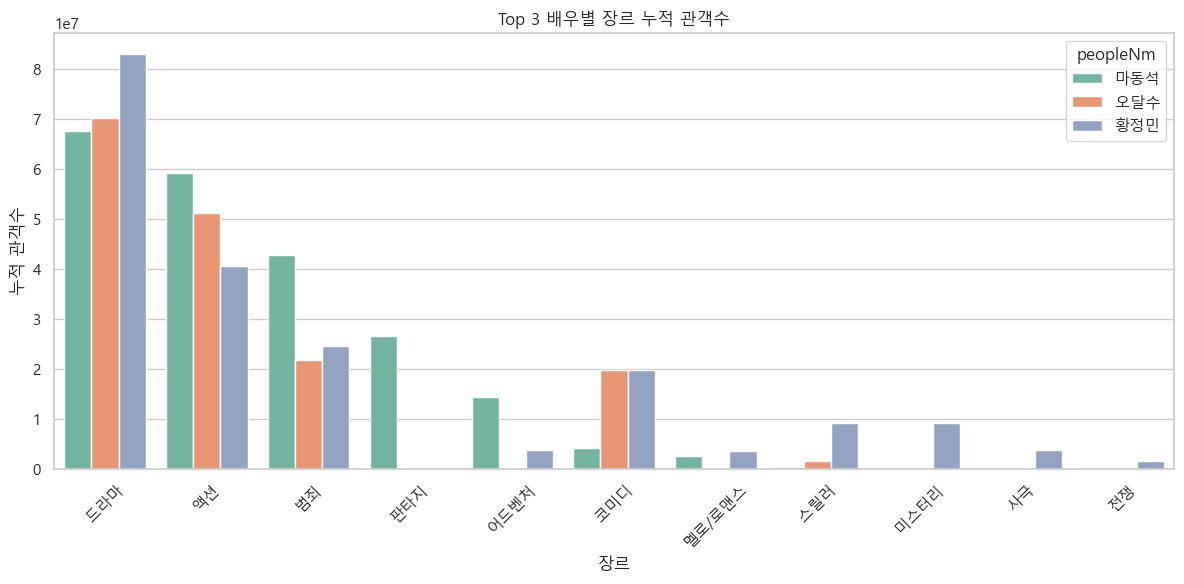

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_summary, x='genreNm', y='audiAcc', hue='peopleNm', palette='Set2')

plt.title("Top 3 배우별 장르 누적 관객수")
plt.ylabel("누적 관객수")
plt.xlabel("장르")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [163]:
movienm_summary = top3_actors.groupby(['genreNm', 'movieNm', 'peopleNm'])['audiAcc'].sum().reset_index()
movienm_summary = movienm_summary.sort_values(['peopleNm', 'genreNm', 'audiAcc'], ascending=[True, True, False])

In [166]:
# 1000만 이상 필터링
top_over10m = movienm_summary[
        (movienm_summary['audiAcc'] >= 10000000)
]

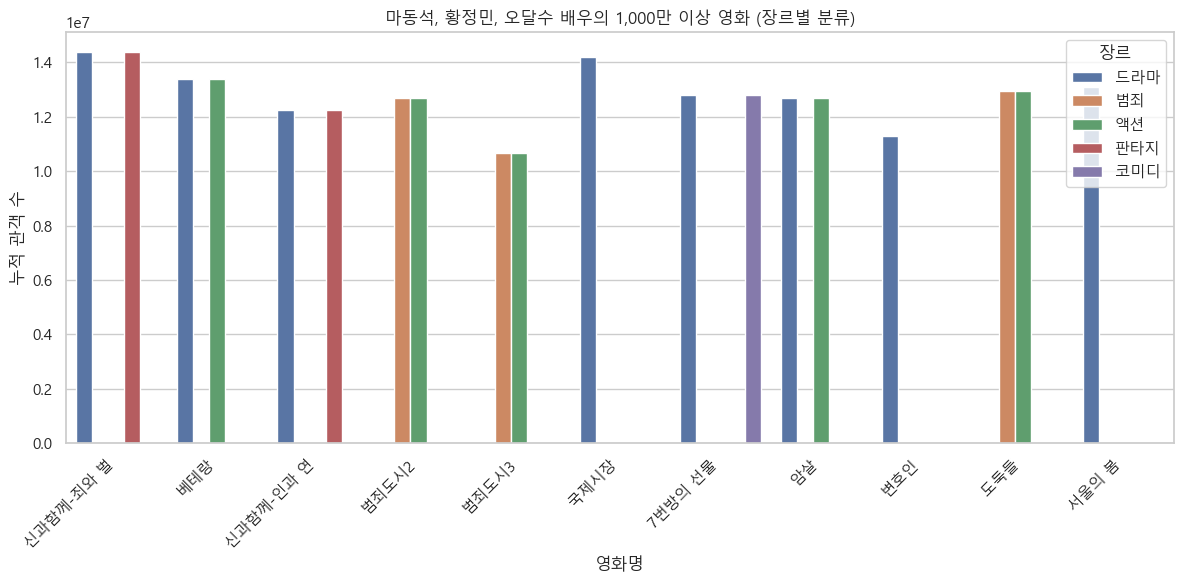

In [208]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_over10m, x='movieNm', y='audiAcc', hue='genreNm', palette="deep")

plt.title("마동석, 황정민, 오달수 배우의 1,000만 이상 영화 (장르별 분류)")
plt.xlabel("영화명")
plt.ylabel("누적 관객 수")
plt.xticks(rotation=45, ha='right')
plt.legend(title='장르')
plt.tight_layout()
plt.show()

```python
** 출연횟수는 가장 많은데, 누적 관램객수는 저조한 경우
    - 이상희 배우
        - 주요 장르
```

In [211]:
lee_actors = actors_df[(actors_df['peopleNm'] == '이상희')]
lee_actors = pd.merge(lee_actors, genres_df, on = 'movieCd', how = 'left')

In [213]:
lee_actors = pd.merge(lee_actors, movie_name, on = 'movieCd', how = 'left')
lee_actors = lee_actors.dropna()
lee_actors

,peopleNm,cast,movieCd,genreNm,movieNm,audiAcc
18,이상희,용덕 부,20119341,범죄,아이들...,1846698.0
19,이상희,용덕 부,20119341,스릴러,아이들...,1846698.0
20,이상희,지구대장,20110296,공포(호러),고양이: 죽음을 보는 두 개의 눈,660831.0
21,이상희,정비소 사장,20112534,드라마,도가니,4636595.0
22,이상희,조반장,20125920,스릴러,이웃사람,2416123.0
...,...,...,...,...,...,...
103,이상희,장유정,20217905,액션,데시벨,869280.0
104,이상희,전파사 주인,20218541,액션,밀수,5113127.0
105,이상희,명술,20248465,범죄,하이재킹,1739223.0
106,이상희,명술,20248465,액션,하이재킹,1739223.0


In [214]:
lee_genre_summary = lee_actors.groupby(['peopleNm', 'genreNm'])['audiAcc'].sum().reset_index()
lee_genre_summary = lee_genre_summary.sort_values(['peopleNm', 'audiAcc'], ascending=[True, False])
lee_genre_summary

,peopleNm,genreNm,audiAcc
1,이상희,드라마,67315947.0
8,이상희,액션,40775833.0
4,이상희,범죄,19025543.0
6,이상희,스릴러,16305088.0
10,이상희,코미디,10831927.0
2,이상희,멜로/로맨스,6430161.0
5,이상희,사극,4178955.0
0,이상희,공포(호러),1737256.0
3,이상희,미스터리,853084.0
9,이상희,전쟁,578873.0


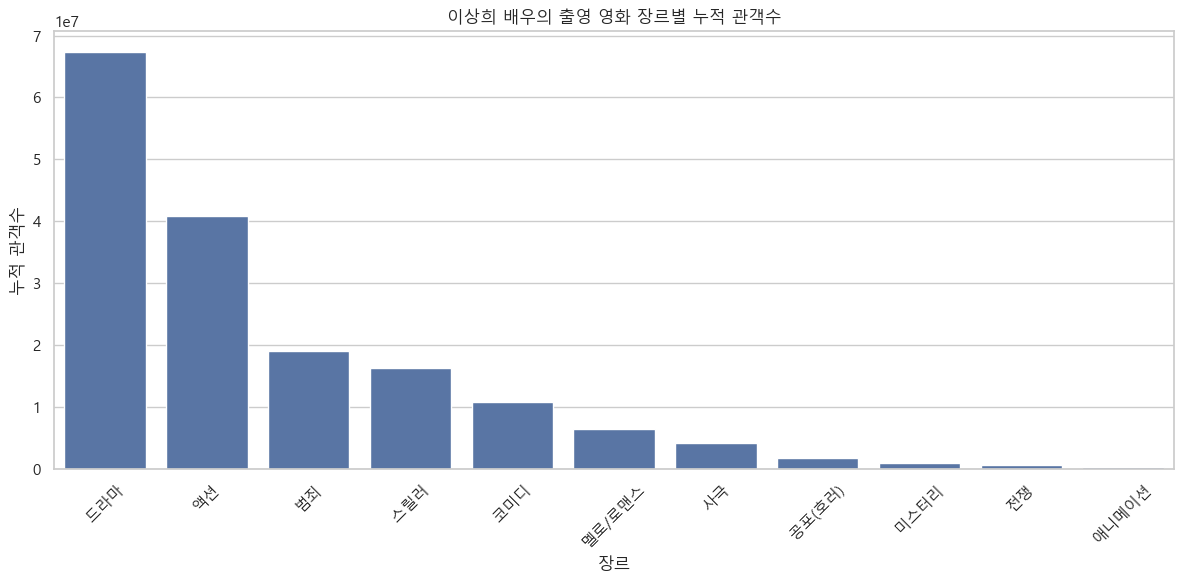

In [217]:
plt.figure(figsize=(12, 6))
sns.barplot(data=lee_genre_summary, x='genreNm', y='audiAcc')

plt.title("이상희 배우의 출영 영화 장르별 누적 관객수")
plt.ylabel("누적 관객수")
plt.xlabel("장르")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [224]:
lee_movie_summary = lee_actors.groupby(['genreNm','peopleNm', 'movieNm'])['audiAcc'].sum().reset_index()
lee_movie_summary = lee_movie_summary.sort_values(['peopleNm', 'audiAcc'], ascending=[True, False])
lee_movie_summary

,genreNm,peopleNm,movieNm,audiAcc
26,드라마,이상희,터널,14152100.0
15,드라마,이상희,베테랑,13397762.0
74,액션,이상희,베테랑,13397762.0
18,드라마,이상희,수상한 그녀,8642334.0
73,액션,이상희,밀정,7458824.0
...,...,...,...,...
27,드라마,이상희,한국이 싫어서,40725.0
20,드라마,이상희,야구소녀,33259.0
57,스릴러,이상희,사이비,10915.0
65,애니메이션,이상희,사이비,10915.0


2) p-value 확인

In [76]:
from scipy.stats import pearsonr

In [80]:
corr, pval = pearsonr(top_sales_actors_20['count'], top_sales_actors_20['audiAcc'])
print(f'상관게수: {corr:.3f}, p-value: {pval:.3f} ')

상관게수: 0.232, p-value: 0.325 


- p-value가 0.325로 유의수준 0.05를 초과하므로, 출연 횟수와 누적 관람객 수 간의 관계는 통계적으로 유의미하지 않다.

### 2-2. 상위 10%의 누적관객수 기준 배우 출연 횟수 Top 20

In [21]:
import matplotlib.font_manager as fm
# 한글 폰트 설정 (예: 나눔고딕)
plt.rc('font', family='NanumGothic')

C:\Users\tmdwn\AppData\Local\Temp\ipykernel_51580\2396745295.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_movies_20['peopleNm'], y = top_movies_20['count'], palette="coolwarm")


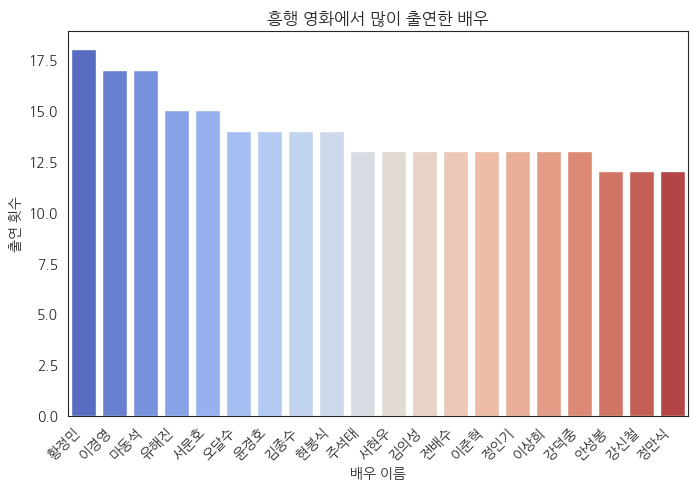

In [22]:
movieNm_sales_df = actors_sales_df.groupby(['movieCd', 'movieNm'])['audiAcc'].max().reset_index()
top_movies = actors_sales_df[actors_sales_df['audiAcc'] >= movieNm_sales_df['audiAcc'].quantile(0.90)]
top_movies_20 = top_movies['peopleNm'].value_counts().reset_index().head(20)

plt.figure(figsize=(8, 5))
sns.barplot(x = top_movies_20['peopleNm'], y = top_movies_20['count'], palette="coolwarm")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel("배우 이름")
plt.ylabel("출연 횟수")
plt.title("흥행 영화에서 많이 출연한 배우")
plt.show()

- 황정민, 이경영, 마동석 등의 배우는 상위 10% 흥행작에 가장 많이 출연한 배우
    - 이 배우들은 흥행 보증 수표로도 불릴 수 있을 만큼 많은 히트작에 참여함.

- 결론
    - 마동석, 황정민, 오달수 등은 흥행 파워가 뛰어난 것으로 확인.
    - 출연 수가 많지만 흥행 관객 수가 증가하는 것은 아닌 것으로 확인
    - 이경영 배우 같은 경우 매우 다작에서 꾸준하게 출연하고 흥행 영화에도 많은 출연을 보임.

In [23]:
actors_sales_df

,peopleNm,cast,movieCd,rank,rankInten,rankOldAndNew,movieNm,openDt,salesAmt,salesShare,...,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,showRange,yearWeekTime,boxofficeType
11993,김윤진,채연희,20101399,7.0,-1.0,OLD,심장이 뛴다,2011-01-05,614553000.0,5.7,...,7.356681e+09,80954.0,-94608.0,-53.9,985142.0,267.0,2510.0,20110121~20110123,201103.0,주말 박스오피스
11994,박해일,이휘도,20101399,7.0,-1.0,OLD,심장이 뛴다,2011-01-05,614553000.0,5.7,...,7.356681e+09,80954.0,-94608.0,-53.9,985142.0,267.0,2510.0,20110121~20110123,201103.0,주말 박스오피스
11995,강신일,최 원장,20101399,7.0,-1.0,OLD,심장이 뛴다,2011-01-05,614553000.0,5.7,...,7.356681e+09,80954.0,-94608.0,-53.9,985142.0,267.0,2510.0,20110121~20110123,201103.0,주말 박스오피스
11996,이승준,문 선생,20101399,7.0,-1.0,OLD,심장이 뛴다,2011-01-05,614553000.0,5.7,...,7.356681e+09,80954.0,-94608.0,-53.9,985142.0,267.0,2510.0,20110121~20110123,201103.0,주말 박스오피스
11997,전배수,박 실장,20101399,7.0,-1.0,OLD,심장이 뛴다,2011-01-05,614553000.0,5.7,...,7.356681e+09,80954.0,-94608.0,-53.9,985142.0,267.0,2510.0,20110121~20110123,201103.0,주말 박스오피스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49239,케일리 스패니,NaN,20244850,10.0,0.0,NEW,시빌 워: 분열의 시대,2024-12-31,335194620.0,3.0,...,8.368452e+08,31689.0,31689.0,100.0,80373.0,575.0,2672.0,20250103~20250105,202501.0,주말 박스오피스
49240,와그너 모라,NaN,20244850,10.0,0.0,NEW,시빌 워: 분열의 시대,2024-12-31,335194620.0,3.0,...,8.368452e+08,31689.0,31689.0,100.0,80373.0,575.0,2672.0,20250103~20250105,202501.0,주말 박스오피스
49241,스티븐 헨더슨,NaN,20244850,10.0,0.0,NEW,시빌 워: 분열의 시대,2024-12-31,335194620.0,3.0,...,8.368452e+08,31689.0,31689.0,100.0,80373.0,575.0,2672.0,20250103~20250105,202501.0,주말 박스오피스
49242,제시 플레먼스,NaN,20244850,10.0,0.0,NEW,시빌 워: 분열의 시대,2024-12-31,335194620.0,3.0,...,8.368452e+08,31689.0,31689.0,100.0,80373.0,575.0,2672.0,20250103~20250105,202501.0,주말 박스오피스


### 2-3. 많은 영화를 연출한 감독일 수록 누적 관객수가 높을 것이다.

In [24]:
# 중복 제거
directors_df = directors_df.drop_duplicates(subset=['peopleNm','movieCd'], keep='first')

In [25]:
directors_sales_df = directors_df.merge(sales_max_df, how = 'left', on = 'movieCd')
directors_sales_df

,peopleNm,peopleNmEn,movieCd,rank,rankInten,rankOldAndNew,movieNm,openDt,salesAmt,salesShare,...,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,showRange,yearWeekTime,boxofficeType
0,강우석,KANG Woo-suk,20030410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,피터 잭슨,Peter Jackson,20030316,7.0,0.0,NEW,반지의 제왕 : 왕의 귀환,2003-12-17,174424020.0,4.4,...,4.588568e+09,13305.0,13305.0,100.0,719411.0,166.0,625.0,20210319~20210321,202111.0,주말 박스오피스
2,안진우,AHN Jin-woo,20030420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,리차드 커티스,Richard Curtis,20030404,10.0,-5.0,OLD,러브 액츄얼리,2003-12-05,24064720.0,0.9,...,2.305173e+09,2584.0,-1992.0,-43.5,325088.0,98.0,293.0,20201225~20201227,202052.0,주말 박스오피스
4,보 웰치,Bo Welch,20030426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,타셈 싱,Tarsem Singh,20246777,10.0,8.0,OLD,더 폴: 디렉터스 컷,2024-12-25,121538200.0,0.8,...,2.442607e+08,10619.0,7982.0,302.7,22161.0,89.0,367.0,20241227~20241229,202452.0,주말 박스오피스
4184,김성제,KIM Seong-je,20190300,6.0,-3.0,OLD,보고타: 마지막 기회의 땅,2024-12-31,325439360.0,4.0,...,3.669721e+09,33980.0,-69174.0,-67.1,396287.0,661.0,3385.0,20250110~20250112,202502.0,주말 박스오피스
4185,제프 파울러,Jeff Fowler,20244167,5.0,0.0,OLD,수퍼 소닉3,2025-01-01,274031280.0,5.1,...,2.950621e+09,30278.0,-23881.0,-44.1,322100.0,613.0,2604.0,20250117~20250119,202503.0,주말 박스오피스
4186,알렉스 가랜드,Alex Garland,20244850,10.0,0.0,NEW,시빌 워: 분열의 시대,2024-12-31,335194620.0,3.0,...,8.368452e+08,31689.0,31689.0,100.0,80373.0,575.0,2672.0,20250103~20250105,202501.0,주말 박스오피스


In [26]:
directors_sales_df = directors_sales_df[(directors_sales_df['openDt'] >= '2011-01-01') & (directors_sales_df['openDt'] < '2025-01-01')]
directors_sales_df.head()

,peopleNm,peopleNmEn,movieCd,rank,rankInten,rankOldAndNew,movieNm,openDt,salesAmt,salesShare,...,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,showRange,yearWeekTime,boxofficeType
1390,윤재근,YOON Jae-keun,20101399,7.0,-1.0,OLD,심장이 뛴다,2011-01-05,6.145530e+08,5.7,...,7.356681e+09,80954.0,-94608.0,-53.9,985142.0,267.0,2510.0,20110121~20110123,201103.0,주말 박스오피스
1391,스기시마 쿠니히사,Kunihisa Sugishima,20102413,8.0,0.0,NEW,극장판 메탈 베이블레이드 VS 태양 작열의 침략자 솔블레이즈,2011-01-05,2.604440e+08,2.0,...,3.113130e+08,38316.0,38316.0,100.0,46127.0,111.0,807.0,20110107~20110109,201101.0,주말 박스오피스
1392,톰 맥그라스,Tom McGrath,20102421,7.0,0.0,OLD,메가마인드,2011-01-13,4.199925e+08,1.8,...,8.596626e+09,48073.0,8731.0,22.2,864893.0,155.0,1143.0,20110204~20110206,201105.0,주말 박스오피스
1393,에드워드 즈윅,Edward Zwick,20110031,4.0,0.0,OLD,러브 & 드럭스,2011-01-13,1.028516e+09,9.5,...,3.476566e+09,127724.0,-54673.0,-30.0,443378.0,274.0,2572.0,20110121~20110123,201103.0,주말 박스오피스
1394,도미닉 세나,Dominic Sena,20110029,5.0,0.0,OLD,시즌 오브 더 위치: 마녀 호송단,2011-01-13,7.882250e+08,7.3,...,2.999886e+09,102944.0,-79391.0,-43.5,397218.0,220.0,2941.0,20110121~20110123,201103.0,주말 박스오피스


In [27]:
directors_sales_df.columns

Index(['peopleNm', 'peopleNmEn', 'movieCd', 'rank', 'rankInten',
       'rankOldAndNew', 'movieNm', 'openDt', 'salesAmt', 'salesShare',
       'salesInten', 'salesChange', 'salesAcc', 'audiCnt', 'audiInten',
       'audiChange', 'audiAcc', 'scrnCnt', 'showCnt', 'showRange',
       'yearWeekTime', 'boxofficeType'],
      dtype='object')

In [28]:
directors_saleacc = directors_sales_df.groupby('peopleNm')['audiAcc'].sum().reset_index()
directors_saleacc

,peopleNm,audiAcc
0,D.J. 카루소,1054847.0
1,F. 게리 그레이,4500232.0
2,J 블레이크슨,108698.0
3,J.J. 에이브럼스,5776311.0
4,M. 나이트 샤말란,2792850.0
...,...,...
1689,히라바야시 이사무,17562.0
1690,히라야마 미호,127100.0
1691,히로키 류이치,157331.0
1692,히시다 마사카즈,20934.0


In [29]:
directors_saleacc.sort_values(by = 'audiAcc', ascending = False).head(20)

,peopleNm,audiAcc
407,류승완,43222862.0
1258,조 루소,37822174.0
812,안소니 루소,37822174.0
179,김한민,36839171.0
1380,최동훈,28552163.0
136,김용화,28449404.0
1049,이석훈,27354814.0
1468,크리스 벅,25413865.0
1477,크리스토퍼 놀란,24799254.0
1224,제니퍼 리,24028011.0


C:\Users\tmdwn\AppData\Local\Temp\ipykernel_51580\2635212118.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors, x='total_audience', y='peopleNm', palette='viridis')


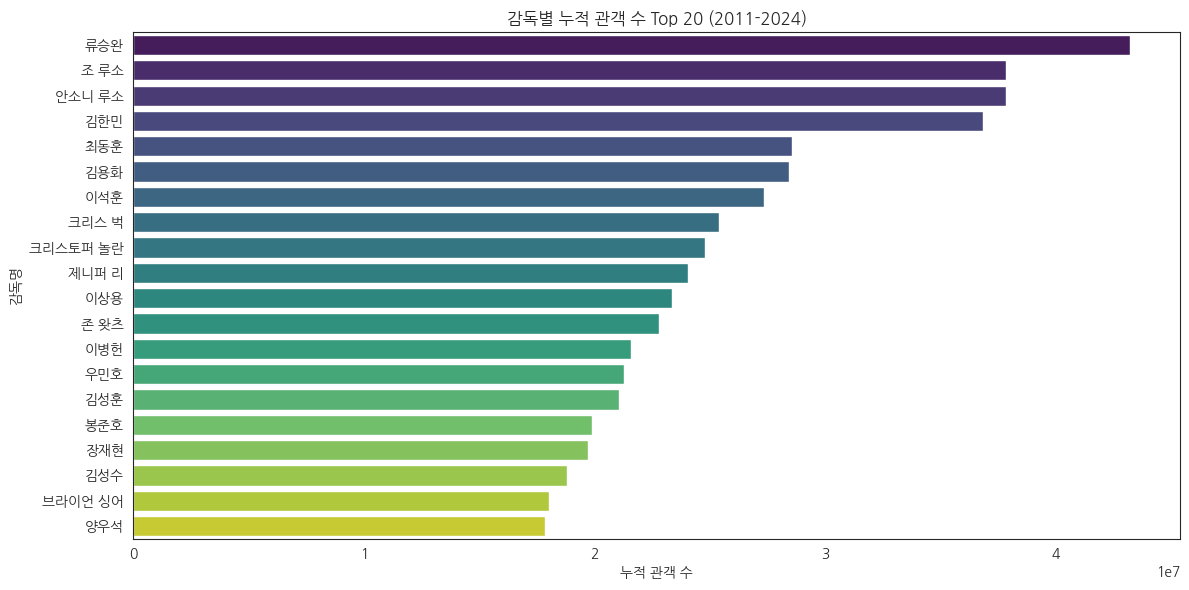

In [30]:
# 감독별 누적 관객수 및 작품 수 계산
director_summary = directors_sales_df.groupby('peopleNm').agg(
    total_audience=('audiAcc', 'sum'),
    film_count=('movieCd', 'nunique')
).reset_index()

# 누적 관객 수 기준 정렬 후 Top 20
top_directors = director_summary.sort_values(by='total_audience', ascending=False).head(20)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='total_audience', y='peopleNm', palette='viridis')
plt.title("감독별 누적 관객 수 Top 20 (2011-2024)")
plt.xlabel("누적 관객 수")
plt.ylabel("감독명")
plt.tight_layout()
plt.show()

In [31]:
import matplotlib.font_manager as fm
# 한글 폰트 설정 (예: 나눔고딕)
plt.rc('font', family='NanumGothic')

C:\Users\tmdwn\AppData\Local\Temp\ipykernel_51580\735572580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_directors_by_count, x='total_audience', y='peopleNm', palette='rocket')
C:\Users\tmdwn\AppData\Local\Temp\ipykernel_51580\735572580.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='bold')
C:\Users\tmdwn\AppData\Local\Temp\ipykernel_51580\735572580.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, fontweight='bold')


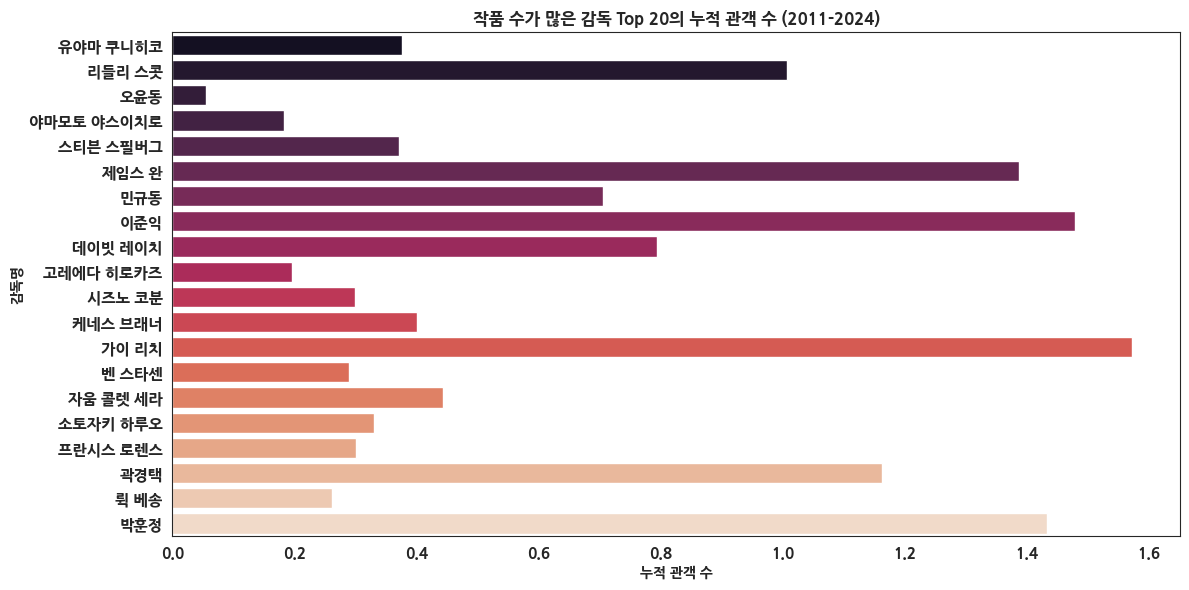

In [32]:
# 연출 작품 수 기준 Top 20 감독 선정
top_directors_by_count = director_summary.sort_values(by='film_count', ascending=False).head(20)

# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_directors_by_count, x='total_audience', y='peopleNm', palette='rocket')
sns.set_style('white')
plt.title("작품 수가 많은 감독 Top 20의 누적 관객 수 (2011-2024)", fontweight='bold')
plt.xlabel("누적 관객 수", fontweight='bold')
plt.ylabel("감독명", fontweight='bold')

ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [33]:
import matplotlib.font_manager as fm
# 한글 폰트 설정 (예: 나눔고딕)
plt.rc('font', family='NanumGothic')

C:\Users\tmdwn\AppData\Local\Temp\ipykernel_51580\2737491944.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='bold')
C:\Users\tmdwn\AppData\Local\Temp\ipykernel_51580\2737491944.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, fontweight='bold')


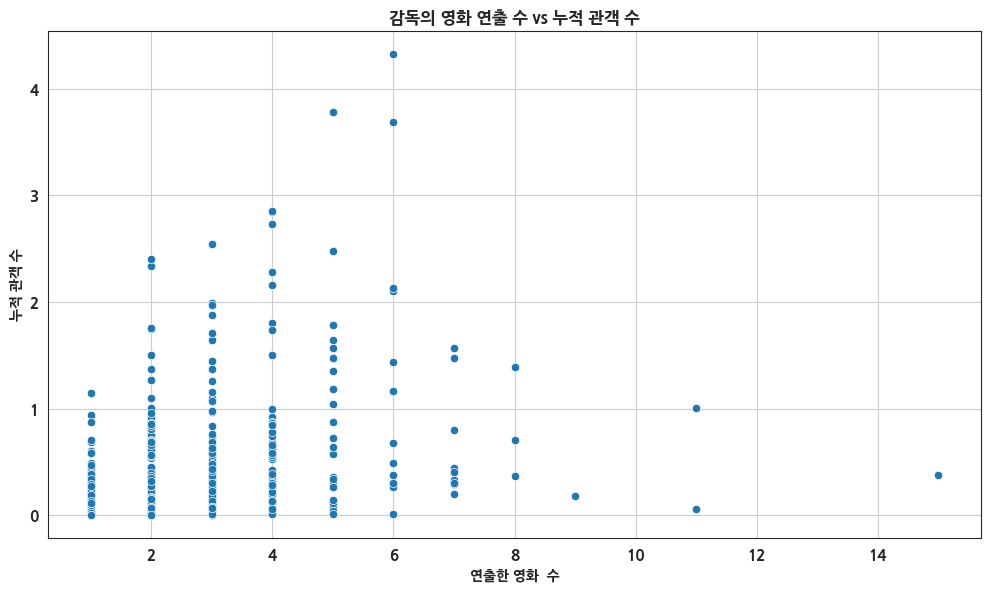

In [34]:
# 산점도 (감독당 영화 수 vs 누적 관객 수)
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=director_summary, x='film_count', y='total_audience')
plt.title("감독의 영화 연출 수 vs 누적 관객 수", fontweight='bold')
plt.xlabel("연출한 영화  수", fontweight='bold')
plt.ylabel("누적 관객 수", fontweight='bold')
plt.grid(True)
plt.tight_layout()
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, fontweight='bold')
plt.show()

In [226]:
directors_df

,peopleNm,peopleNmEn,movieCd
0,강우석,KANG Woo-suk,20030410
1,피터 잭슨,Peter Jackson,20030316
2,안진우,AHN Jin-woo,20030420
3,리차드 커티스,Richard Curtis,20030404
4,보 웰치,Bo Welch,20030426
...,...,...,...
4243,타셈 싱,Tarsem Singh,20246777
4244,김성제,KIM Seong-je,20190300
4245,제프 파울러,Jeff Fowler,20244167
4246,알렉스 가랜드,Alex Garland,20244850


In [228]:
movie_count = directors_df.groupby('peopleNm')['movieCd'].nunique().reset_index(name='movie_count')

director_sales = pd.merge(directors_df, sales_df[['movieCd', 'audiAcc']], on='movieCd', how='left')

# 감독별 누적 관객 수 집계
audi_acc_sum = director_sales.groupby('peopleNm')['audiAcc'].sum().reset_index(name='audiAcc_sum')

# 감독별 영화 수 + 누적 관객 수 merge
director_summary = pd.merge(movie_count, audi_acc_sum, on='peopleNm')

In [229]:
director_summary

,peopleNm,movie_count,audiAcc_sum
0,D.J. 카루소,5,1726103.0
1,F. 게리 그레이,5,19584733.0
2,J 블레이크슨,2,120068.0
3,J. 마키에 그러버,1,0.0
4,J.J. 에이브럼스,6,18593518.0
...,...,...,...
2240,히라바야시 이사무,2,17562.0
2241,히라야마 미호,1,228345.0
2242,히로키 류이치,1,157331.0
2243,히시다 마사카즈,1,20934.0


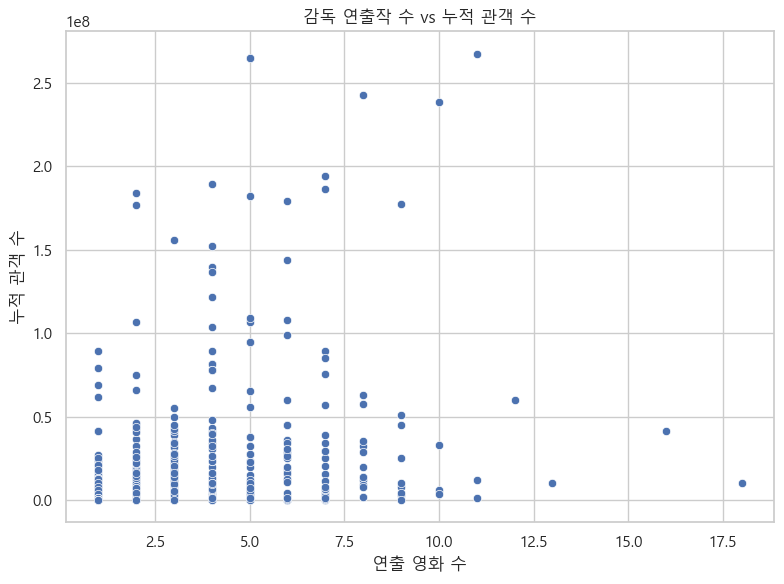

상관계수: 0.418, p-value: 0.000


In [230]:
# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(data=director_summary, x='movie_count', y='audiAcc_sum')
plt.title('감독 연출작 수 vs 누적 관객 수')
plt.xlabel('연출 영화 수')
plt.ylabel('누적 관객 수')
plt.tight_layout()
plt.show()

# 상관 분석
corr, pval = pearsonr(director_summary['movie_count'], director_summary['audiAcc_sum'])
print(f'상관계수: {corr:.3f}, p-value: {pval:.3f}')

### 2-4. 장르별 시각화

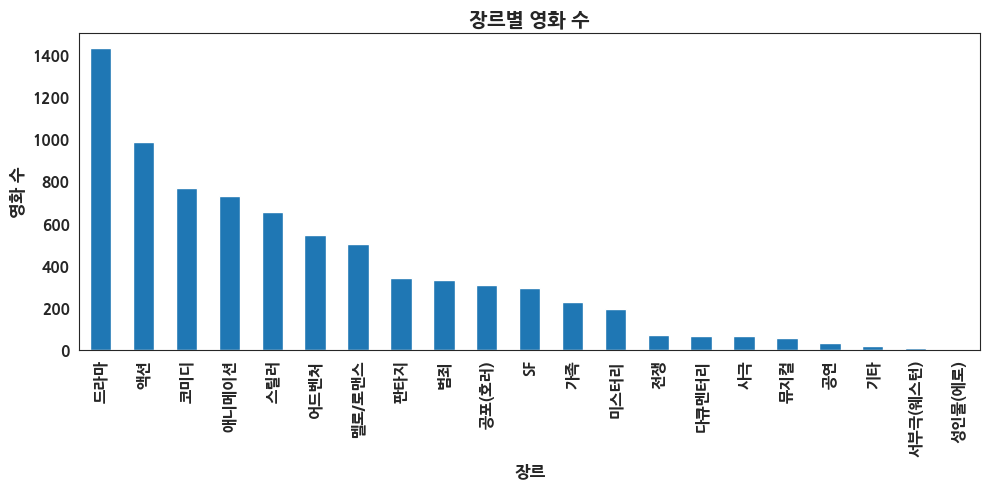

In [35]:
plt.figure(figsize=(10, 5))
ax = genres_df['genreNm'].value_counts().plot(kind='bar', title='장르별 영화 수')

# 타이틀 굵게
plt.title('장르별 영화 수', fontsize=14, fontweight='bold')

# 축 레이블 굵게
plt.xlabel('장르', fontsize=12, fontweight='bold')
plt.ylabel('영화 수', fontsize=12, fontweight='bold')

# 눈금 레이블 굵게
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.tight_layout()
plt.show()

- 드라마, 액션, 코미디, 애니메이션, 스릴러 순으로 가장 많은 영화를 차지함.

<Axes: title={'center': '스크린 수 vs 누적 관객수'}, xlabel='scrnCnt', ylabel='audiAcc'>

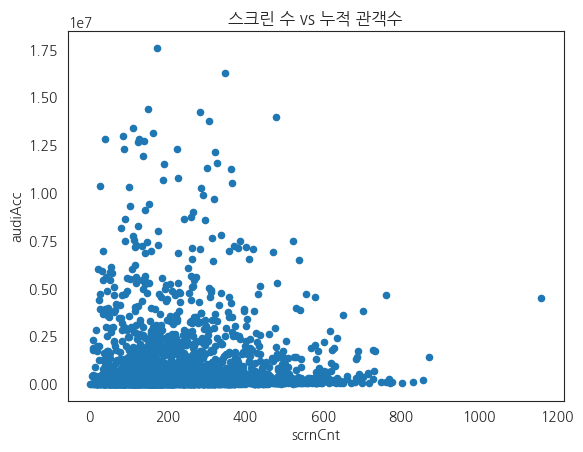

In [36]:
# 관객수와 스크린 수의 상관관계
sales_max_df.plot(kind='scatter', x='scrnCnt', y='audiAcc', title='스크린 수 vs 누적 관객수')

- 스크린수가 많을 수록 누적 관객수가 높은 것은 아니다

# 3. 데이터 전처리

### 3-1. 흥행 영화 (누적 관객수 상위 10%) 기준으로 전체 영화 중 참여한 퍼센티지를 흥행률로 하여 새로운 컬럼 생성 (배우, 영화감독)

In [37]:
# hit ratio actor
actors_sales_top_df = actors_sales_df[actors_sales_df['audiAcc'] >= actors_sales_df['audiAcc'].quantile(0.9)]
top_actors_movies_count = actors_sales_top_df['peopleNm'].value_counts().reset_index()
top_actors_movies_count

,peopleNm,count
0,황정민,12
1,오달수,12
2,마동석,12
3,이경영,12
4,강신철,11
...,...,...
2434,전여빈,1
2435,원진아,1
2436,오하늬,1
2437,하민,1


In [38]:
actors_movie_count = actors_sales_df['peopleNm'].value_counts().reset_index()
actors_movie_count = actors_movie_count.merge(top_actors_movies_count, how = 'left', on = 'peopleNm').fillna(0)
actors_movie_count['hit_ratio_actor'] = actors_movie_count['count_y'] / actors_movie_count['count_x']
actors_movie_count

,peopleNm,count_x,count_y,hit_ratio_actor
0,엄상현,63,0.0,0.000000
1,이상희,57,7.0,0.122807
2,이준혁,45,7.0,0.155556
3,이경영,44,12.0,0.272727
4,김태훈,41,4.0,0.097561
...,...,...,...,...
13412,오래영,1,0.0,0.000000
13413,안희진,1,0.0,0.000000
13414,박상필,1,0.0,0.000000
13415,고창희,1,0.0,0.000000


In [39]:
actors_sales_df = actors_sales_df.merge(actors_movie_count[['peopleNm', 'hit_ratio_actor']], how = 'left', on = 'peopleNm')

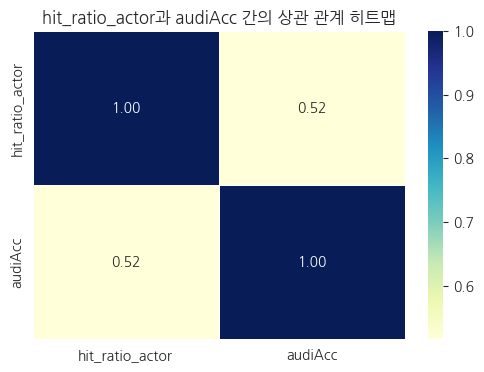

In [40]:
# 상관계수 행렬 계산
correlation_matrix = actors_sales_df[['hit_ratio_actor', 'audiAcc']].corr()

# 히트맵 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("hit_ratio_actor과 audiAcc 간의 상관 관계 히트맵")
plt.show()

- 0.52로 상관관계 있으므로 hit ratio actor 컬럼 사용

In [41]:
# hit ratio director
directors_sales_top_df = directors_sales_df[directors_sales_df['audiAcc'] >= directors_sales_df['audiAcc'].quantile(0.9)]
top_directors_movies_count = directors_sales_top_df['peopleNm'].value_counts().reset_index()
top_directors_movies_count

,peopleNm,count
0,류승완,6
1,김한민,4
2,크리스토퍼 놀란,4
3,이석훈,4
4,안소니 루소,4
...,...,...
180,크리스 윌리암스,1
181,김홍선,1
182,진모영,1
183,존 카니,1


In [42]:
directors_movie_count = directors_sales_df['peopleNm'].value_counts().reset_index()
directors_movie_count = directors_movie_count.merge(top_directors_movies_count, how = 'left', on = 'peopleNm').fillna(0)
directors_movie_count['hit_ratio_director'] = directors_movie_count['count_y'] / directors_movie_count['count_x']
directors_movie_count

,peopleNm,count_x,count_y,hit_ratio_director
0,유야마 쿠니히코,15,0.0,0.000000
1,오윤동,11,0.0,0.000000
2,리들리 스콧,11,1.0,0.090909
3,야마모토 야스이치로,9,0.0,0.000000
4,제임스 완,8,2.0,0.250000
...,...,...,...,...
1689,알레산드로 칼로니,1,1.0,1.000000
1690,에릭슨 코어,1,0.0,0.000000
1691,이윤정,1,0.0,0.000000
1692,브렉 에이즈너,1,0.0,0.000000


In [43]:
directors_sales_df = directors_sales_df.merge(directors_movie_count[['peopleNm', 'hit_ratio_director']], how = 'left', on = 'peopleNm')

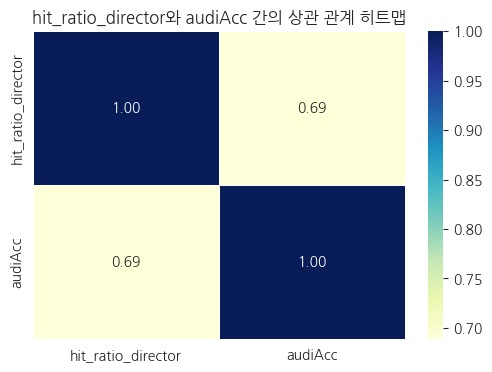

In [44]:
# 상관계수 행렬 계산
correlation_matrix =directors_sales_df[['hit_ratio_director', 'audiAcc']].corr()

# 히트맵 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("hit_ratio_director와 audiAcc 간의 상관 관계 히트맵")
plt.show()

- 0.69로 상관관계 있음
- 따라서, 추후 머신러닝 학습시 hit_ratio_actor와 hit_ratio_director 컬럼을 사용

### 3-2. 인코딩 진행 및 merge

In [45]:
genres_df = genres_df.drop_duplicates(subset=['genreNm','movieCd'], keep='first')

# 인코딩 진행
genres_encoded_df = genres_df.pivot_table(index='movieCd', columns='genreNm', aggfunc=lambda x: 1, fill_value=0)
genres_encoded_df = genres_encoded_df.reset_index()
genres_encoded_df

genreNm,movieCd,SF,가족,공연,공포(호러),기타,다큐멘터리,드라마,멜로/로맨스,뮤지컬,...,사극,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지
0,19820019,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,19838068,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19880001,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19888010,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,19910182,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,20249434,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3945,20249507,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3946,20249554,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3947,20249733,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [46]:
movie_df = movie_df.drop_duplicates(subset=['movieNm','movieCd'], keep='first')
movie_df

,movieCd,movieNm,showTm,prdtYear,openDt,prdtStatNm,typeNm,nations,gradeNm
0,20030410,실미도,135.0,2003.0,20031224.0,개봉,장편,[{'nationNm': '한국'}],15세관람가
1,20030316,반지의 제왕 : 왕의 귀환,262.0,2003.0,20031217.0,개봉,장편,[{'nationNm': '미국'}],12세관람가
2,20030420,동해물과 백두산이,104.0,2003.0,20031231.0,개봉,장편,[{'nationNm': '한국'}],15세관람가
3,20030404,러브 액츄얼리,130.0,2003.0,20031205.0,개봉,장편,"[{'nationNm': '미국'}, {'nationNm': '영국'}]",15세관람가
4,20030426,더 캣,85.0,2003.0,20031231.0,개봉,장편,[{'nationNm': '미국'}],전체관람가
...,...,...,...,...,...,...,...,...,...
4002,20246777,더 폴: 디렉터스 컷,119.0,2024.0,20241225.0,개봉,장편,[{'nationNm': '영국'}],12세이상관람가
4003,20190300,보고타: 마지막 기회의 땅,106.0,2024.0,20241231.0,개봉,장편,[{'nationNm': '한국'}],15세이상관람가
4004,20244167,수퍼 소닉3,109.0,2024.0,20250101.0,개봉,장편,[{'nationNm': '미국'}],전체관람가
4005,20244850,시빌 워: 분열의 시대,109.0,2024.0,20241231.0,개봉,장편,[{'nationNm': '미국'}],15세이상관람가


In [47]:
movie_df2 = movie_df[['movieCd', 'openDt', 'gradeNm']]
merge_df = movie_df2.merge(genres_encoded_df, on = 'movieCd', how = 'left')
merge_df

,movieCd,openDt,gradeNm,SF,가족,공연,공포(호러),기타,다큐멘터리,드라마,...,사극,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지
0,20030410,20031224.0,15세관람가,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20030316,20031217.0,12세관람가,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,20030420,20031231.0,15세관람가,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,20030404,20031205.0,15세관람가,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20030426,20031231.0,전체관람가,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,20246777,20241225.0,12세이상관람가,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3949,20190300,20241231.0,15세이상관람가,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,20244167,20250101.0,전체관람가,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3951,20244850,20241231.0,15세이상관람가,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [48]:
showtypes_df = showtypes_df.drop_duplicates(subset=['showTypeGroupNm','showTypeNm','movieCd'], keep='first')
showtypes_df2 = showtypes_df[['showTypeGroupNm', 'movieCd']]
showtypes_encoded_df = showtypes_df2.pivot_table(index='movieCd', columns='showTypeGroupNm', aggfunc=lambda x: 1, fill_value=0)
showtypes_encoded_df = showtypes_encoded_df.reset_index()
showtypes_encoded_df

showTypeGroupNm,movieCd,2D,3D,4D,DOLBYCINEMA,IMAX,ScreenX,필름,흑백판
0,19820019,1,0,0,0,0,0,1,0
1,19838068,1,0,0,0,0,0,1,0
2,19880001,1,0,0,0,0,0,1,0
3,19888010,1,0,0,0,0,0,1,0
4,19910182,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
3947,20249434,1,0,1,1,1,1,0,0
3948,20249507,1,0,1,1,1,0,0,0
3949,20249554,1,0,0,0,0,0,0,0
3950,20249733,1,0,0,0,0,0,0,0


In [49]:
merge_df = merge_df.merge(showtypes_encoded_df, on = 'movieCd', how = 'left')
merge_df

,movieCd,openDt,gradeNm,SF,가족,공연,공포(호러),기타,다큐멘터리,드라마,...,코미디,판타지,2D,3D,4D,DOLBYCINEMA,IMAX,ScreenX,필름,흑백판
0,20030410,20031224.0,15세관람가,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20030316,20031217.0,12세관람가,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,20030420,20031231.0,15세관람가,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,20030404,20031205.0,15세관람가,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20030426,20031231.0,전체관람가,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,20246777,20241225.0,12세이상관람가,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949,20190300,20241231.0,15세이상관람가,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,20244167,20250101.0,전체관람가,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3951,20244850,20241231.0,15세이상관람가,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [50]:
# merge_df에서 openDt 기준 2011년부터 2024년 데이터 뽑기
merge_df = merge_df[(merge_df['openDt'] >= 20110101.0) & (merge_df['openDt'] < 20250101.0)]
merge_df

,movieCd,openDt,gradeNm,SF,가족,공연,공포(호러),기타,다큐멘터리,드라마,...,코미디,판타지,2D,3D,4D,DOLBYCINEMA,IMAX,ScreenX,필름,흑백판
1293,20101399,20110105.0,15세이상관람가,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,20102413,20110105.0,전체관람가,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1295,20102421,20110113.0,전체관람가,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1296,20110031,20110113.0,청소년관람불가,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1297,20110029,20110113.0,15세이상관람가,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,20228796,20241224.0,15세이상관람가,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3946,20246201,20241225.0,전체관람가,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3948,20246777,20241225.0,12세이상관람가,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949,20190300,20241231.0,15세이상관람가,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2616 entries, 1293 to 3951
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieCd      2616 non-null   object 
 1   openDt       2616 non-null   float64
 2   gradeNm      2616 non-null   object 
 3   SF           2616 non-null   float64
 4   가족           2616 non-null   float64
 5   공연           2616 non-null   float64
 6   공포(호러)       2616 non-null   float64
 7   기타           2616 non-null   float64
 8   다큐멘터리        2616 non-null   float64
 9   드라마          2616 non-null   float64
 10  멜로/로맨스       2616 non-null   float64
 11  뮤지컬          2616 non-null   float64
 12  미스터리         2616 non-null   float64
 13  범죄           2616 non-null   float64
 14  사극           2616 non-null   float64
 15  서부극(웨스턴)     2616 non-null   float64
 16  성인물(에로)      2616 non-null   float64
 17  스릴러          2616 non-null   float64
 18  애니메이션        2616 non-null   float64
 19  액션      

In [52]:
# gradeNm 컬럼 확인
merge_df['gradeNm'].value_counts()

gradeNm
15세이상관람가    924
12세이상관람가    697
전체관람가       683
청소년관람불가     311
15세관람가        1
Name: count, dtype: int64

In [53]:
# 15세 관람가인 큐어 영화 확인 결과 15세 이상으로 확인인
merge_df[merge_df['gradeNm'] == '15세관람가']

,movieCd,openDt,gradeNm,SF,가족,공연,공포(호러),기타,다큐멘터리,드라마,...,코미디,판타지,2D,3D,4D,DOLBYCINEMA,IMAX,ScreenX,필름,흑백판
3540,19978805,20220706.0,15세관람가,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
movie_df[movie_df['movieCd'] == '19978805']

,movieCd,movieNm,showTm,prdtYear,openDt,prdtStatNm,typeNm,nations,gradeNm
3587,19978805,큐어,111.0,1997.0,20220706.0,개봉,장편,[{'nationNm': '일본'}],15세관람가


In [55]:
merge_df['gradeNm'] = merge_df['gradeNm'].replace('15세관람가', '15세이상관람가')
merge_df['gradeNm'].value_counts()

C:\Users\tmdwn\AppData\Local\Temp\ipykernel_51580\2571974878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df['gradeNm'] = merge_df['gradeNm'].replace('15세관람가', '15세이상관람가')


gradeNm
15세이상관람가    925
12세이상관람가    697
전체관람가       683
청소년관람불가     311
Name: count, dtype: int64

In [56]:
## gradeNm 컬럼 인코딩
merge_df = pd.get_dummies(merge_df, columns=['gradeNm'])
## 컬럼 grade_Nm 제거거
merge_df.columns = [col.replace("gradeNm_", "") for col in merge_df.columns]
# openDt 컬제거럼 
merge_df.drop(columns = ['openDt'], inplace = True)
merge_df

,movieCd,SF,가족,공연,공포(호러),기타,다큐멘터리,드라마,멜로/로맨스,뮤지컬,...,4D,DOLBYCINEMA,IMAX,ScreenX,필름,흑백판,12세이상관람가,15세이상관람가,전체관람가,청소년관람불가
1293,20101399,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,False,False
1294,20102413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,False,True,False
1295,20102421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,False,False,True,False
1296,20110031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,False,False,True
1297,20110029,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,20228796,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,False,True,False,False
3946,20246201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False
3948,20246777,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False
3949,20190300,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False


In [57]:
merge_df2 = actors_sales_df.merge(directors_sales_df[['movieCd', 'hit_ratio_director']], how = 'left', on = 'movieCd')
merge_df2 = merge_df2[['movieCd', 'openDt', 'audiAcc', 'hit_ratio_actor', 'hit_ratio_director']]
merge_df2

,movieCd,openDt,audiAcc,hit_ratio_actor,hit_ratio_director
0,20101399,2011-01-05,985142.0,0.125000,0.0
1,20101399,2011-01-05,985142.0,0.200000,0.0
2,20101399,2011-01-05,985142.0,0.000000,0.0
3,20101399,2011-01-05,985142.0,0.117647,0.0
4,20101399,2011-01-05,985142.0,0.360000,0.0
...,...,...,...,...,...
39170,20244850,2024-12-31,80373.0,0.000000,0.0
39171,20244850,2024-12-31,80373.0,0.000000,0.0
39172,20244850,2024-12-31,80373.0,0.000000,0.0
39173,20244850,2024-12-31,80373.0,0.000000,0.0


In [58]:
# merge_df2에서 hit_ratio_director이 null 값 존재
# 확인 결과, 영화의 감독이 누락된 경우 발생
# 이는 0으로 결측치 처리
merge_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39175 entries, 0 to 39174
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieCd             39175 non-null  object 
 1   openDt              39175 non-null  object 
 2   audiAcc             39175 non-null  float64
 3   hit_ratio_actor     39175 non-null  float64
 4   hit_ratio_director  38953 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.5+ MB


In [59]:
merge_df2[merge_df2['hit_ratio_director'].isnull()]

,movieCd,openDt,audiAcc,hit_ratio_actor,hit_ratio_director
14905,20189525,2018-01-18,21050.0,0.0,NaN
14906,20189525,2018-01-18,21050.0,0.0,NaN
14907,20189525,2018-01-18,21050.0,0.0,NaN
14908,20189525,2018-01-18,21050.0,0.0,NaN
14909,20189525,2018-01-18,21050.0,0.0,NaN
...,...,...,...,...,...
38928,20244001,2024-10-01,35874.0,0.0,NaN
38929,20244001,2024-10-01,35874.0,0.0,NaN
38930,20244001,2024-10-01,35874.0,0.0,NaN
38991,20242375,2024-10-30,29214.0,0.0,NaN


In [60]:
merge_df2 = merge_df2.fillna(0.0)

In [61]:
final_df = merge_df2.merge(merge_df, on = 'movieCd', how = 'left')
final_df

,movieCd,openDt,audiAcc,hit_ratio_actor,hit_ratio_director,SF,가족,공연,공포(호러),기타,...,4D,DOLBYCINEMA,IMAX,ScreenX,필름,흑백판,12세이상관람가,15세이상관람가,전체관람가,청소년관람불가
0,20101399,2011-01-05,985142.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,False,False
1,20101399,2011-01-05,985142.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,False,False
2,20101399,2011-01-05,985142.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,False,False
3,20101399,2011-01-05,985142.0,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,False,False
4,20101399,2011-01-05,985142.0,0.360000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39170,20244850,2024-12-31,80373.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,False,True,False,False
39171,20244850,2024-12-31,80373.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,False,True,False,False
39172,20244850,2024-12-31,80373.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,False,True,False,False
39173,20244850,2024-12-31,80373.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,False,True,False,False


In [62]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39175 entries, 0 to 39174
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieCd             39175 non-null  object 
 1   openDt              39175 non-null  object 
 2   audiAcc             39175 non-null  float64
 3   hit_ratio_actor     39175 non-null  float64
 4   hit_ratio_director  39175 non-null  float64
 5   SF                  39175 non-null  float64
 6   가족                  39175 non-null  float64
 7   공연                  39175 non-null  float64
 8   공포(호러)              39175 non-null  float64
 9   기타                  39175 non-null  float64
 10  다큐멘터리               39175 non-null  float64
 11  드라마                 39175 non-null  float64
 12  멜로/로맨스              39175 non-null  float64
 13  뮤지컬                 39175 non-null  float64
 14  미스터리                39175 non-null  float64
 15  범죄                  39175 non-null  float64
 16  사극  

In [63]:
final_df.shape

(39175, 38)

In [64]:
# 날짜 컬럼 숫자로 변환
final_df['openDt'] = pd.to_datetime(final_df['openDt'])

In [65]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39175 entries, 0 to 39174
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movieCd             39175 non-null  object        
 1   openDt              39175 non-null  datetime64[ns]
 2   audiAcc             39175 non-null  float64       
 3   hit_ratio_actor     39175 non-null  float64       
 4   hit_ratio_director  39175 non-null  float64       
 5   SF                  39175 non-null  float64       
 6   가족                  39175 non-null  float64       
 7   공연                  39175 non-null  float64       
 8   공포(호러)              39175 non-null  float64       
 9   기타                  39175 non-null  float64       
 10  다큐멘터리               39175 non-null  float64       
 11  드라마                 39175 non-null  float64       
 12  멜로/로맨스              39175 non-null  float64       
 13  뮤지컬                 39175 non-null  float64   

In [66]:
final_df.iloc[:,-5:]

,흑백판,12세이상관람가,15세이상관람가,전체관람가,청소년관람불가
0,0.0,False,True,False,False
1,0.0,False,True,False,False
2,0.0,False,True,False,False
3,0.0,False,True,False,False
4,0.0,False,True,False,False
...,...,...,...,...,...
39170,0.0,False,True,False,False
39171,0.0,False,True,False,False
39172,0.0,False,True,False,False
39173,0.0,False,True,False,False


In [67]:
final_df

,movieCd,openDt,audiAcc,hit_ratio_actor,hit_ratio_director,SF,가족,공연,공포(호러),기타,...,4D,DOLBYCINEMA,IMAX,ScreenX,필름,흑백판,12세이상관람가,15세이상관람가,전체관람가,청소년관람불가
0,20101399,2011-01-05,985142.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,False,False
1,20101399,2011-01-05,985142.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,False,False
2,20101399,2011-01-05,985142.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,False,False
3,20101399,2011-01-05,985142.0,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,False,False
4,20101399,2011-01-05,985142.0,0.360000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39170,20244850,2024-12-31,80373.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,False,True,False,False
39171,20244850,2024-12-31,80373.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,False,True,False,False
39172,20244850,2024-12-31,80373.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,False,True,False,False
39173,20244850,2024-12-31,80373.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,False,True,False,False


In [68]:
## movieCd 별 한 행으로 만들기. 
final_df = final_df.groupby("movieCd").agg({
    "openDt": "first",  # 개봉일은 첫 번째 값 사용
    "audiAcc": "first",  # 관객수 평균
    "hit_ratio_actor": "mean",  # 배우 흥행률 평균
    "hit_ratio_director": "mean",  # 감독 흥행률 평균
    **{col: "max" for col in final_df.columns if col not in ["movieCd", "openDt", "audiAcc", "hit_ratio_actor", "hit_ratio_director"]}  # 나머지는 최대값 사용
}).reset_index()


# 4. 머신러닝

In [69]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np

In [70]:
    # 연도 컬럼 생성
    final_df['year'] = final_df['openDt'].dt.year

    # 2024년을 테스트 데이터로, 2011~2023년을 훈련 데이터로 설정
    train_df = final_df[final_df['year'] < 2024].drop(columns=['year', 'openDt', 'movieCd'])
    test_df = final_df[final_df['year'] == 2024].drop(columns=['year', 'openDt', 'movieCd'])

    # X, y 데이터 분리
    X_train = train_df.drop(columns=['audiAcc'])  # 독립변수 (훈련 데이터)
    y_train = train_df['audiAcc']  # 종속변수 (훈련 데이터)

    X_test = test_df.drop(columns=['audiAcc'])  # 독립변수 (테스트 데이터)
    y_test = test_df['audiAcc']  # 종속변수 (테스트 데이터)

In [71]:
print(len(train_df), len(test_df))
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

2272 139
2272 2272
139 139


## 4-1. RandomForest

In [72]:
# 모델 정의 및 훈련
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [73]:
# 예측
y_pred_rf = rf_model.predict(X_test)

# 평가 지표
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

In [74]:

print("Random Forest 평가 지표")
print(f"MSE: {mse:,.0f}")
print(f"R2 Score: {r2:.4f}")

Random Forest 평가 지표
MSE: 980,668,238,143
R2 Score: 0.7043


In [75]:
y_test_sorted = y_test.reset_index(drop=True)

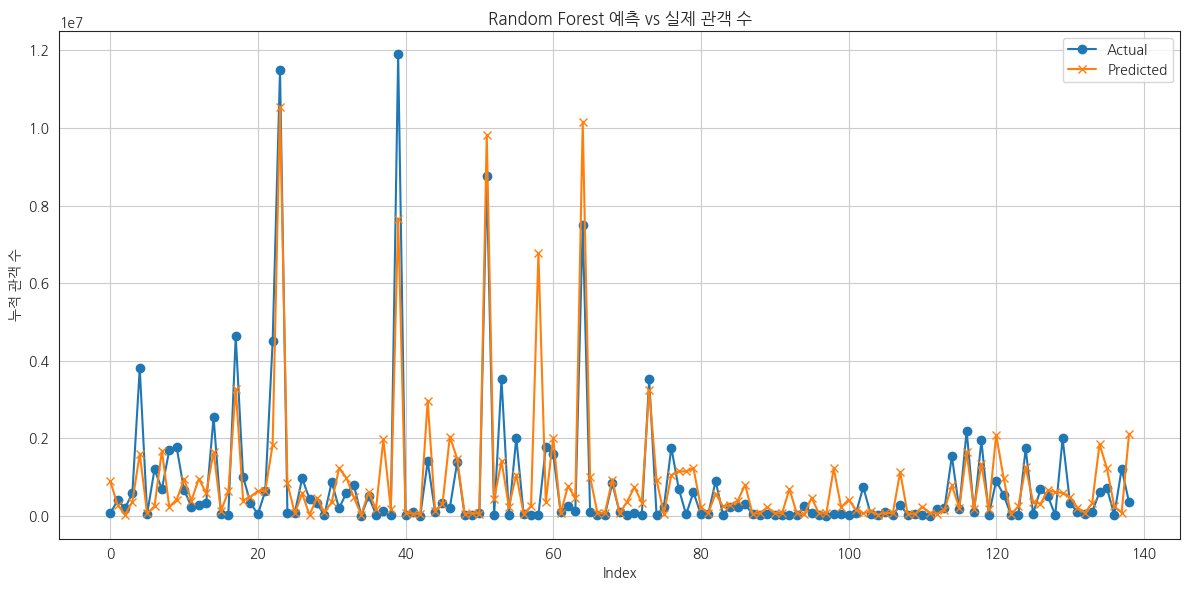

In [76]:
plt.figure(figsize = (12,6))
plt.plot(y_test_sorted, label = 'Actual', marker = 'o')
plt.plot(y_pred_rf, label = 'Predicted', marker = 'x')
plt.title("Random Forest 예측 vs 실제 관객 수")
plt.xlabel("Index")
plt.ylabel("누적 관객 수")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

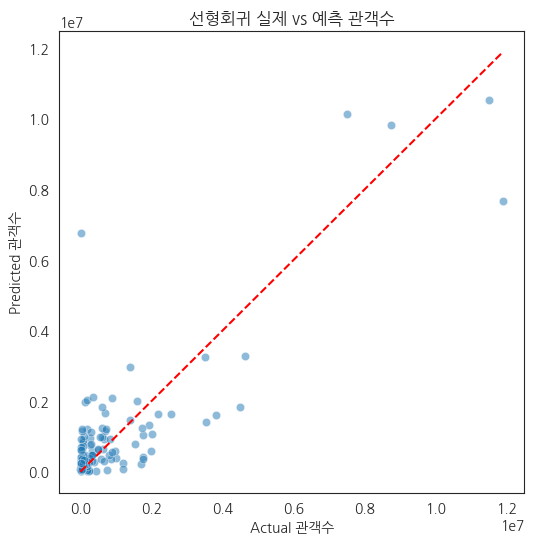

In [77]:
# 실제치와 예측치의 차이를 그래프로 확인

comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf,
    'Difference': y_test - y_pred_rf
})
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 완벽한 예측 선
plt.xlabel("Actual 관객수")
plt.ylabel("Predicted 관객수")
plt.title("선형회귀 실제 vs 예측 관객수")
plt.show()

## 4-2. RandomForest, XGBRegressor, GradientBoostingRegressor, LGBMRegressor

In [78]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Random Forest': RandomForestRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'LightGBM': LGBMRegressor(random_state=42)
    }

    results = []

    plt.figure(figsize=(14, 10))
    for i, (name, model) in enumerate(models.items(), 1):
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        results.append({
            'Model': name,
            'MSE': round(mse, 2),
            'R² Score': round(r2, 4)
        })

        # 시각화
        plt.subplot(2, 2, i)
        plt.scatter(y_test, preds, alpha=0.6)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'{name} (R²: {r2:.3f})')

    plt.tight_layout()
    plt.show()

    return pd.DataFrame(results)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 2272, number of used features: 29
[LightGBM] [Info] Start training from score 924610.661532


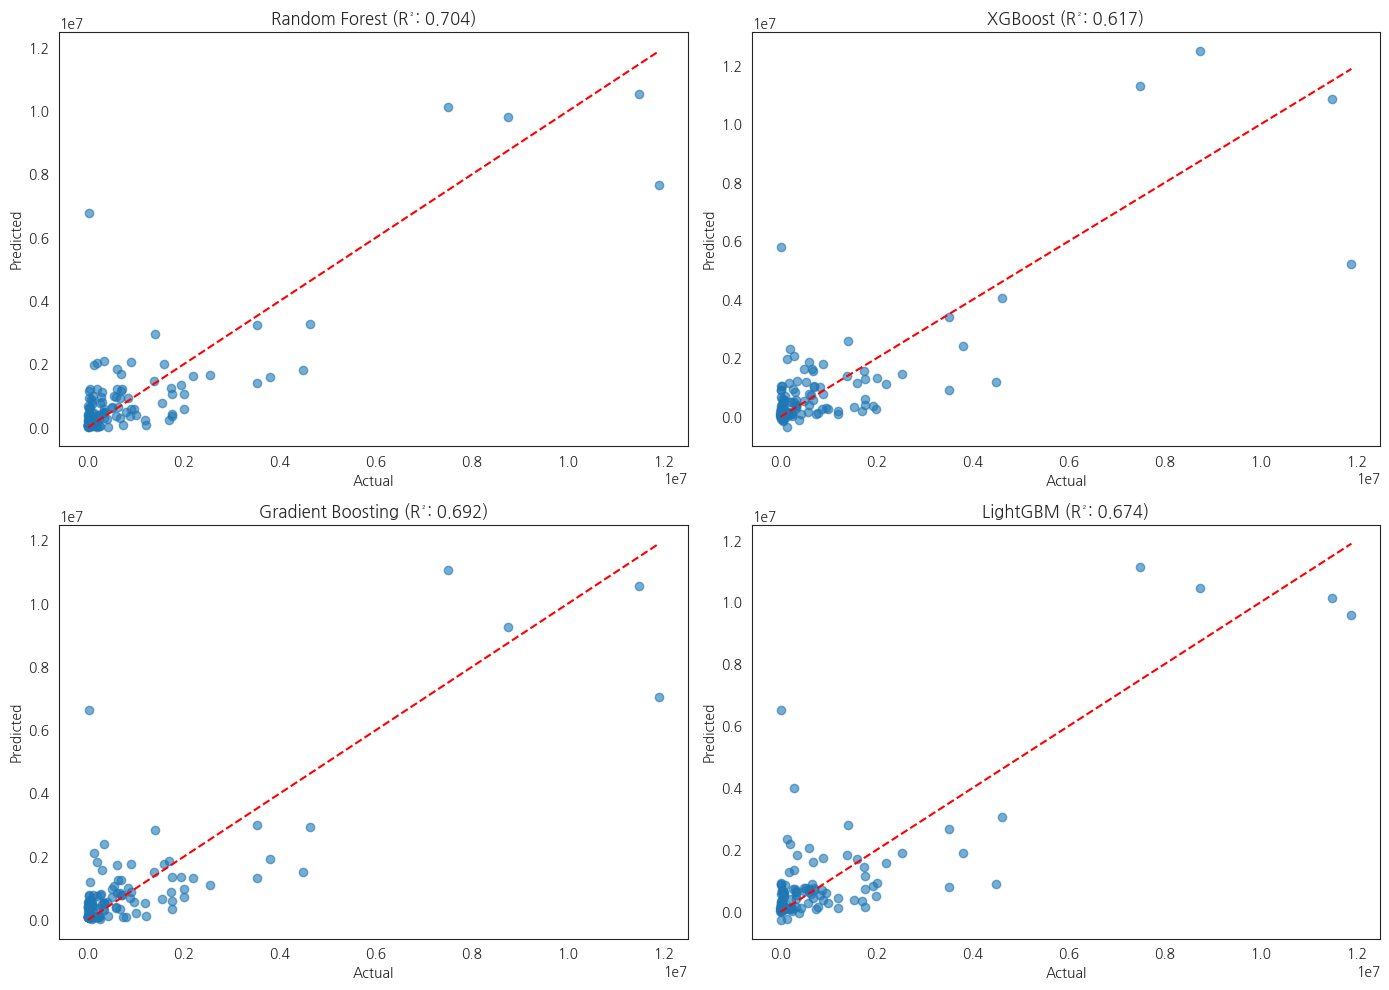

               Model           MSE  R² Score
0      Random Forest  9.806682e+11    0.7043
1            XGBoost  1.268712e+12    0.6174
2  Gradient Boosting  1.021962e+12    0.6918
3           LightGBM  1.081461e+12    0.6739


In [79]:
results_df = train_and_evaluate_models(X_train, X_test, y_train, y_test)
print(results_df)

- 4개의 모델을 훈련시켜 확인한 결과, Random Forest가 가장 적합한 모델로 확인

C:\Users\tmdwn\AppData\Local\Temp\ipykernel_37464\2061240371.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(20), x='Importance', y='Feature', palette='viridis')


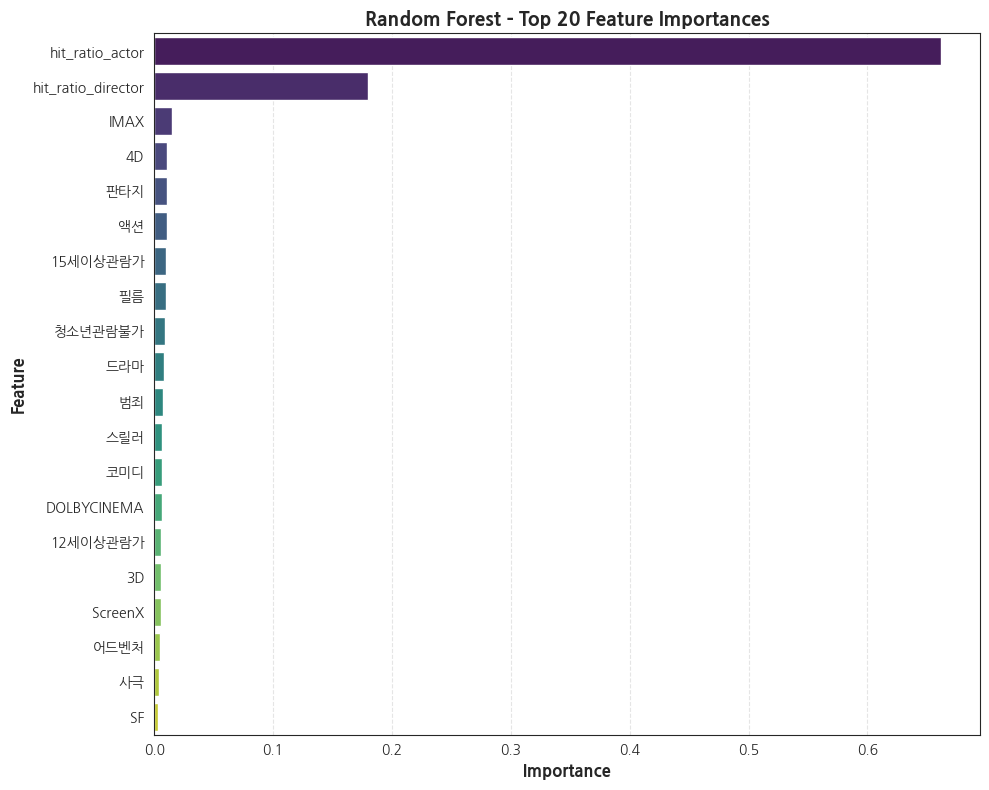

In [80]:
# RandomForest의 feature importance_
# 특성 중요도 추출
importances = rf_model.feature_importances_
feature_names = X_train.columns

# DataFrame으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest - Top 20 Feature Importances', fontsize=14, fontweight='bold')
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 4-3. RandomForest feature importance

In [81]:
importance_df

,Feature,Importance
0,hit_ratio_actor,0.661644
1,hit_ratio_director,0.179925
27,IMAX,0.015069
25,4D,0.010908
22,판타지,0.010866
18,액션,0.010690
32,15세이상관람가,0.010216
29,필름,0.009783
34,청소년관람불가,0.008766
8,드라마,0.008012


### 4-3-1. 중요도 0.01 이상

In [82]:
importance_feature = importance_df[importance_df['Importance'] >= 0.01]['Feature'].tolist()

In [83]:
X_train_imp = X_train[importance_feature]
X_test_imp = X_test[importance_feature]

In [84]:
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model2.fit(X_train_imp, y_train)

RandomForestRegressor(random_state=42)

In [85]:
# 예측
y_pred_rf2 = rf_model2.predict(X_test_imp)

# 평가 지표
mse = mean_squared_error(y_test, y_pred_rf2)
r2 = r2_score(y_test, y_pred_rf2)

In [86]:
print("Random Forest 평가 지표")
print(f"MSE: {mse:,.0f}")
print(f"R2 Score: {r2:.4f}")

Random Forest 평가 지표
MSE: 816,299,573,547
R2 Score: 0.7538


- 정확도가 올라가긴 하였으나, 모든 컬럼을 사용해야, 나중에 영화 관련 데이터를 예측할 때 용이할 것으로 판단.
    - 따라서, 하이퍼파라미터 튜닝을 진행

## 4-4. Randomforest 파라미터 튜닝

### 4-4-1. n_estimators 변경 (1000, 2000, 3000)

In [87]:
rf_model3 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_model3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [88]:
y_pred_rf3  = rf_model3.predict(X_test)

In [89]:
# 평가 지표
mse = mean_squared_error(y_test, y_pred_rf3)
r2 = r2_score(y_test, y_pred_rf3)

In [90]:
print("Random Forest 평가 지표")
print(f"MSE: {mse:,.0f}")
print(f"R2 Score: {r2:.4f}")

Random Forest 평가 지표
MSE: 969,476,982,915
R2 Score: 0.7077


- 기존 0.7043 미세한 상승...

In [91]:
rf_model4 = RandomForestRegressor(n_estimators = 2000, random_state = 42)
rf_model4.fit(X_train, y_train)

RandomForestRegressor(n_estimators=2000, random_state=42)

In [92]:
y_pred_rf4  = rf_model4.predict(X_test)

In [93]:
# 평가 지표
mse = mean_squared_error(y_test, y_pred_rf4)
r2 = r2_score(y_test, y_pred_rf4)

In [94]:
print("Random Forest 평가 지표")
print(f"MSE: {mse:,.0f}")
print(f"R2 Score: {r2:.4f}")

Random Forest 평가 지표
MSE: 975,277,141,478
R2 Score: 0.7059


- n_estimaotrs = 1000일 때 보다 미세하게 하락..

In [95]:
rf_model5 = RandomForestRegressor(n_estimators = 3000, random_state = 42)
rf_model5.fit(X_train, y_train)

RandomForestRegressor(n_estimators=3000, random_state=42)

In [96]:
y_pred_rf5  = rf_model5.predict(X_test)

In [97]:
# 평가 지표
mse = mean_squared_error(y_test, y_pred_rf5)
r2 = r2_score(y_test, y_pred_rf5)

In [98]:
print("Random Forest 평가 지표")
print(f"MSE: {mse:,.0f}")
print(f"R2 Score: {r2:.4f}")

Random Forest 평가 지표
MSE: 967,825,624,934
R2 Score: 0.7082


- n_estimators가 3,000일 때가 가장 높음
    - 3,000 기준 다른 파라미터를 그리드서치로 확인해보자

In [99]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [3000, 4000],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_model6 = RandomForestRegressor(random_state = 42, n_jobs = -1)
grid_cv = GridSearchCV(rf_model6, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 4000}
최고 예측 정확도: 0.6635


- 해당 파라미터로 모델을 훈련해보자

In [100]:
rf_model7 = RandomForestRegressor(n_estimators = 4000, 
                                  max_depth = 6,
                                  min_samples_leaf = 8,
                                  min_samples_split = 8,
                                  random_state = 42)
rf_model7.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=4000, random_state=42)

In [101]:
y_pred_rf7  = rf_model7.predict(X_test)

In [102]:
# 평가 지표
mse = mean_squared_error(y_test, y_pred_rf7)
r2 = r2_score(y_test, y_pred_rf7)

In [103]:
print("Random Forest 평가 지표")
print(f"MSE: {mse:,.0f}")
print(f"R2 Score: {r2:.4f}")

Random Forest 평가 지표
MSE: 1,068,239,346,386
R2 Score: 0.6779


- 더 낮게 정확도가 나옴.
    - 랜덤사이즈서치CV를 이용해보자.

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params = {
    'n_estimators': randint(500, 5000),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2']
}

rf_model8 = RandomForestRegressor(random_state=42, n_jobs=-1)
rand_search = RandomizedSearchCV(rf_model8, param_distributions=params, 
                                 n_iter=30, scoring='r2', cv=5, random_state=42, n_jobs=-1)
rand_search.fit(X_train, y_train)

print("Best Params:", rand_search.best_params_)
print("Best Score: {:.4f}".format(rand_search.best_score_))

Best Params: {'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 2954}
Best Score: 0.6564


## 4-6. 오차가 큰 'audiAcc'를 log로 정규화해서 진행

In [122]:
import numpy as np

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

rf = RandomForestRegressor(n_estimators=3000, random_state=42)
rf.fit(X_train, y_train_log)
pred_log = rf.predict(X_test)
pred = np.expm1(pred_log)

print("MSE:", mean_squared_error(y_test, pred))
print("R2:", r2_score(y_test, pred))

MSE: 1680637320147.6436
R2: 0.49320537538362874


In [145]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("georgejdinicola/world-bank-indicators")

print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'kagglehub'